In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
!gdown 1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4

Downloading...
From (original): https://drive.google.com/uc?id=1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4
From (redirected): https://drive.google.com/uc?id=1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4&confirm=t&uuid=1b2efd91-5dcc-4955-8a71-7ceaaf3be69b
To: /content/creditcard.csv
100% 151M/151M [00:02<00:00, 74.5MB/s]


In [16]:
data_path = "/content/creditcard.csv"
df = pd.read_csv(data_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
dataset_arr = df.to_numpy()
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]
X = np.concatenate(
    (np.ones(X.shape[0]).reshape(-1, 1), X), axis=1
)
type(X[0][0]), type(y[0])

(numpy.float64, numpy.float64)

In [18]:
X = X.astype(np.float32)
y = y.astype(np.int64)

In [19]:
n_classes = len(np.unique(y))
n_classes

2

In [20]:
y_encoded = np.zeros((y.shape[0], n_classes))
y_encoded[np.arange(y.shape[0]), y] = 1

In [21]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

# Further split training set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [22]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [26]:
def softmax(z):
  e = np.exp(z)
  return e / np.sum(e, axis=1, keepdims=True)

def predict(X, theta):
  return softmax(np.dot(X, theta))

def compute_loss(y_hat, y):
  loss = np.sum(- y * np.log(y_hat), axis=1)
  return np.mean(loss)

def compute_gradient(X, y, y_hat):
  grad = X.T @ (y_hat - y)
  return grad / X.shape[0]

def update_theta(theta, gradient, lr):
  return theta - lr * gradient

def compute_accuracy(X, y, theta):
  pred = np.argmax(predict(X, theta), axis=1)
  return np.mean(pred == np.argmax(y, axis=1))

In [27]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]  # Số lượng đặc trưng (features)

np.random.seed(random_state)
theta = np.random.uniform(
    size=(n_features, n_classes)  # Khởi tạo ngẫu nhiên các tham số mô hình
)
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    # Training loop
    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i + batch_size]
        y_i = y_train[i:i + batch_size]

        y_hat = predict(X_i, theta)  # Prediction
        train_loss = compute_loss(y_hat, y_i)  # Compute loss

        gradient = compute_gradient(X_i, y_i, y_hat)  # Compute gradient
        theta = update_theta(theta, gradient, lr)  # Update parameters

        train_batch_losses.append(train_loss)  # Collect batch loss

        # Compute accuracy on the whole training set
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

    # Validation loop
    y_val_hat = predict(X_val, theta)  # Validation prediction
    val_loss = compute_loss(y_val_hat, y_val)  # Validation loss
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)  # Validation accuracy
    val_batch_accs.append(val_acc)

    # Compute average loss and accuracy for this epoch
    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    # Append epoch results
    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    # Print results for the current epoch
    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')



EPOCH 1:	Training loss: 0.477	Validation loss: 0.274

EPOCH 2:	Training loss: 0.196	Validation loss: 0.139

EPOCH 3:	Training loss: 0.111	Validation loss: 0.089

EPOCH 4:	Training loss: 0.076	Validation loss: 0.065

EPOCH 5:	Training loss: 0.059	Validation loss: 0.052

EPOCH 6:	Training loss: 0.048	Validation loss: 0.044

EPOCH 7:	Training loss: 0.041	Validation loss: 0.038

EPOCH 8:	Training loss: 0.036	Validation loss: 0.033

EPOCH 9:	Training loss: 0.032	Validation loss: 0.030

EPOCH 10:	Training loss: 0.029	Validation loss: 0.027

EPOCH 11:	Training loss: 0.027	Validation loss: 0.025

EPOCH 12:	Training loss: 0.025	Validation loss: 0.023

EPOCH 13:	Training loss: 0.023	Validation loss: 0.022

EPOCH 14:	Training loss: 0.022	Validation loss: 0.020

EPOCH 15:	Training loss: 0.020	Validation loss: 0.019

EPOCH 16:	Training loss: 0.019	Validation loss: 0.018

EPOCH 17:	Training loss: 0.018	Validation loss: 0.017

EPOCH 18:	Training loss: 0.018	Validation loss: 0.016

EPOCH 19:	Training

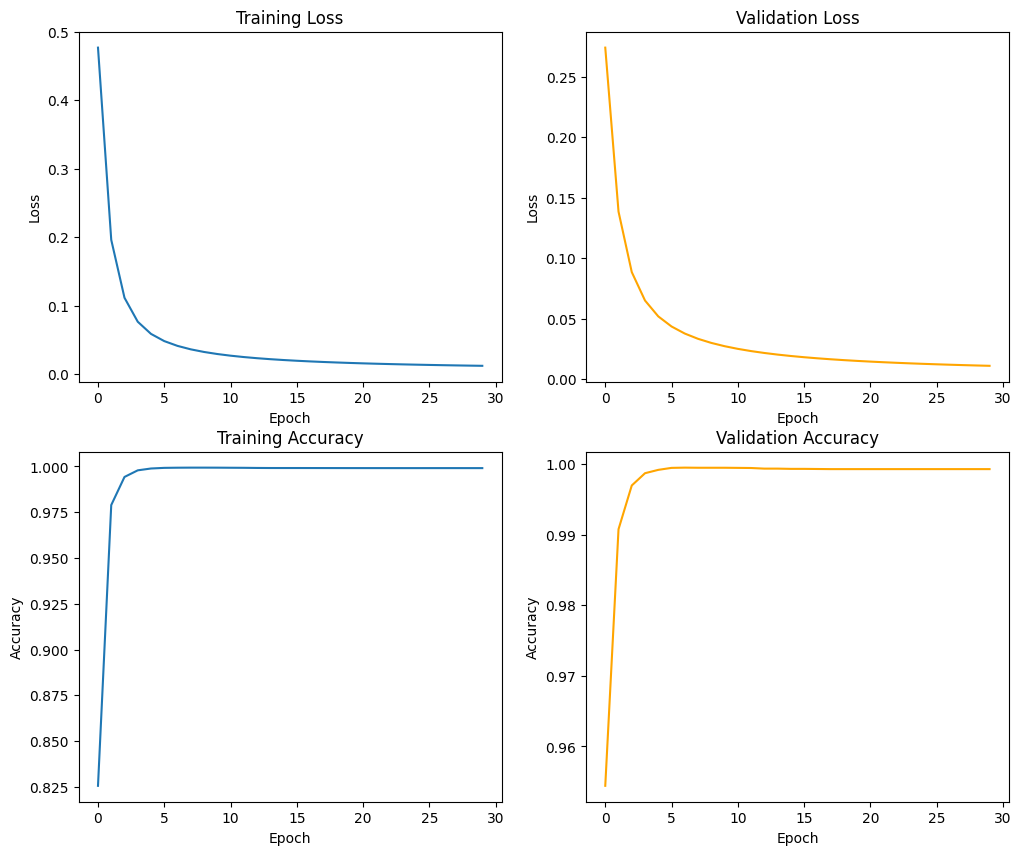

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Training Loss
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

# Validation Loss
ax[0, 1].plot(val_losses, color='orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

# Training Accuracy
ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

# Validation Accuracy
ax[1, 1].plot(val_accs, color='orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [29]:
compute_accuracy(X_test, y_test, theta)

0.9992626663389628

In [30]:
!gdown 1GR3IwbvKNuiVXN5E5eMGyEQtT4pP7kCt

Downloading...
From: https://drive.google.com/uc?id=1GR3IwbvKNuiVXN5E5eMGyEQtT4pP7kCt
To: /content/Twitter_Data.csv
100% 20.9M/20.9M [00:00<00:00, 107MB/s] 


In [31]:
import re
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
data_path = 'Twitter_Data.csv'
df = pd.read_csv(data_path)
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [35]:
df = df.dropna()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [37]:
def text_normaliation(text):
  text = text.lower()
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'^rt[\s]+', '', text)
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
  stop_words = set(stopwords.words('english'))
  words = text.split()
  words = [word for word in words if word not in stop_words]
  stemmer = PorterStemmer()
  words = [stemmer.stem(word) for word in words]
  text = ' '.join(words)
  return text

In [38]:
df['clean_text'] = df['clean_text'].apply(text_normaliation)

In [39]:
df.head()

,clean_text,category
0,modi promis minimum govern maximum govern expe...,-1.0
1,talk nonsens continu drama vote modi,0.0
2,say vote modi welcom bjp told rahul main campa...,1.0
3,ask support prefix chowkidar name modi great s...,1.0
4,answer among power world leader today trump pu...,1.0


In [42]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df['clean_text'])
X.shape

(162969, 2000)

In [44]:
X = X.toarray()
X = np.concatenate(
    (np.ones(X.shape[0]).reshape(-1, 1), X), axis=1
)

In [45]:
X.shape

(162969, 2001)

In [47]:
n_classes = df['category'].nunique()
y = df['category'].values + np.array([1])
y = y.astype(np.int64)
y_encoded = np.zeros((y.shape[0], n_classes))
y_encoded[np.arange(y.shape[0]), y] = 1

In [48]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

# Further split training set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [50]:
num_samples = X_train.shape[0]

In [53]:
lr = 0.1
epochs = 200
batch_size = num_samples
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(
    size=(n_features, n_classes)
)
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    # Training loop
    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i + batch_size]
        y_i = y_train[i:i + batch_size]

        y_hat = predict(X_i, theta)  # Prediction
        train_loss = compute_loss(y_hat, y_i)  # Compute loss

        gradient = compute_gradient(X_i, y_i, y_hat)  # Compute gradient
        theta = update_theta(theta, gradient, lr)  # Update parameters

        train_batch_losses.append(train_loss)  # Collect batch loss

        # Compute accuracy on the whole training set
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

    # Validation loop
    y_val_hat = predict(X_val, theta)  # Validation prediction
    val_loss = compute_loss(y_val_hat, y_val)  # Validation loss
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)  # Validation accuracy
    val_batch_accs.append(val_acc)

    # Compute average loss and accuracy for this epoch
    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    # Append epoch results
    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    # Print results for the current epoch
    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')



EPOCH 1:	Training loss: 1.139	Validation loss: 1.136

EPOCH 2:	Training loss: 1.135	Validation loss: 1.132

EPOCH 3:	Training loss: 1.132	Validation loss: 1.129

EPOCH 4:	Training loss: 1.129	Validation loss: 1.127

EPOCH 5:	Training loss: 1.126	Validation loss: 1.124

EPOCH 6:	Training loss: 1.124	Validation loss: 1.121

EPOCH 7:	Training loss: 1.121	Validation loss: 1.119

EPOCH 8:	Training loss: 1.119	Validation loss: 1.117

EPOCH 9:	Training loss: 1.117	Validation loss: 1.115

EPOCH 10:	Training loss: 1.115	Validation loss: 1.113

EPOCH 11:	Training loss: 1.113	Validation loss: 1.111

EPOCH 12:	Training loss: 1.111	Validation loss: 1.109

EPOCH 13:	Training loss: 1.109	Validation loss: 1.108

EPOCH 14:	Training loss: 1.108	Validation loss: 1.106

EPOCH 15:	Training loss: 1.106	Validation loss: 1.105

EPOCH 16:	Training loss: 1.105	Validation loss: 1.103

EPOCH 17:	Training loss: 1.103	Validation loss: 1.102

EPOCH 18:	Training loss: 1.102	Validation loss: 1.101

EPOCH 19:	Training

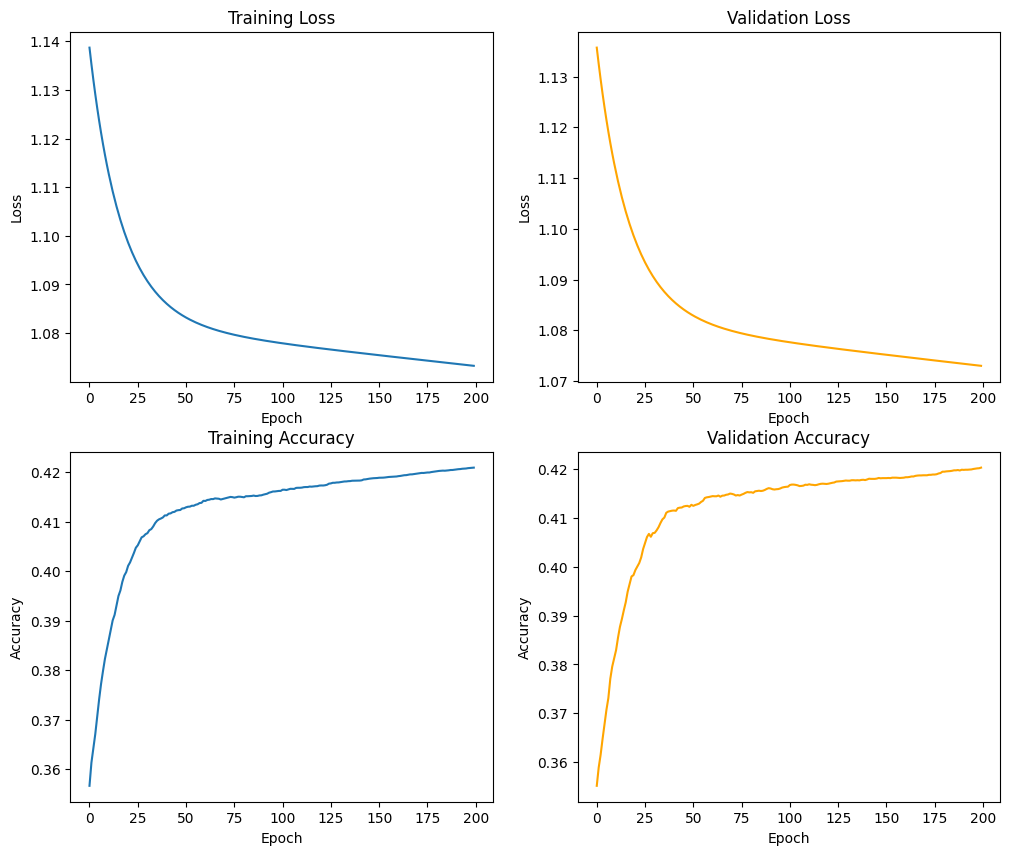

In [54]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Training Loss
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

# Validation Loss
ax[0, 1].plot(val_losses, color='orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

# Training Accuracy
ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

# Validation Accuracy
ax[1, 1].plot(val_accs, color='orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [55]:
compute_accuracy(X_test, y_test, theta)

0.4254770816714733

In [67]:
y_hat = np.array([0.4, 0.15, 0.05, 0.4]).reshape(1, -1)
y = np.array([1, 0, 0, 0]).reshape(1, -1)
compute_loss(y_hat, y)

0.916290731874155

In [61]:
z = np.array([-1, -2, 3, 2]).reshape(1, 4)
softmax(z)

array([[0.01314897, 0.00483724, 0.71790961, 0.26410418]])

In [66]:
def compute_accuracy(y_hat, y):
  return np.mean(y_hat == y)

y_hat = np.array([0, 1, 3, 2, 0, 2, 1, 2]).reshape(1, -1)
y = np.array([0, 0, 3, 2, 1, 2, 2, 1]).reshape(1, -1)
compute_accuracy(y_hat, y)

0.5